In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import sklearn as sci
%matplotlib inline
%load_ext autoreload
%autoreload

df_ori = pd.read_csv('adyen-dataset.csv')
from lib.sampling import subsampling

# Subsample non_fraudulent transactions records so we have balanced dataset
df_fraudulent = df_ori[df_ori['has_fraudulent_dispute'] == True]
df_non_fraudulent = df_ori[df_ori['has_fraudulent_dispute'] == False]
subsample_index= subsampling(df_non_fraudulent.index, len(df_fraudulent))
df_non_fraudulent_subsample  = df_non_fraudulent.loc[subsample_index,:]
df_sample = pd.concat([df_non_fraudulent_subsample,df_fraudulent], axis=0)
df_sample.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(21432, 20)

In [93]:
df_sample.head()
df_sample = df_sample[:2000]

In [94]:
df = df_sample[['ip_address','email_address','card_number']]

In [95]:
def nb_common_attr(transaction1, transaction2):
    assert transaction1.size == transaction2.size
    merged = [*transaction1.values, *transaction2.values]
    nb_common_attr = transaction1.size*2 - len(set(merged))
    return nb_common_attr

In [96]:
import itertools

data = []
for i,j in itertools.combinations(df.index, 2):
    data.append([i, j, nb_common_attr(df.loc[i],df.loc[j])])



KeyboardInterrupt



In [56]:
df_graph = pd.DataFrame(data=data,columns=['transaction_from','transaction_to','weight'])

In [72]:
df_graph  = df_graph[df_graph['weight']>1]
is_fraud = df_ori.loc[df_graph.index]['has_fraudulent_dispute'].values
color_map = ['yellow' if label == True else 'blue' for label in is_fraud]
color_map

['blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue

In [41]:
import networkx as nx

source = 'transaction_from'
target = 'transaction_to'

G = nx.from_pandas_edgelist(df_graph, source=source, target = target, edge_attr='weight')
G.edges()[66532,63780]

{'weight': 1}

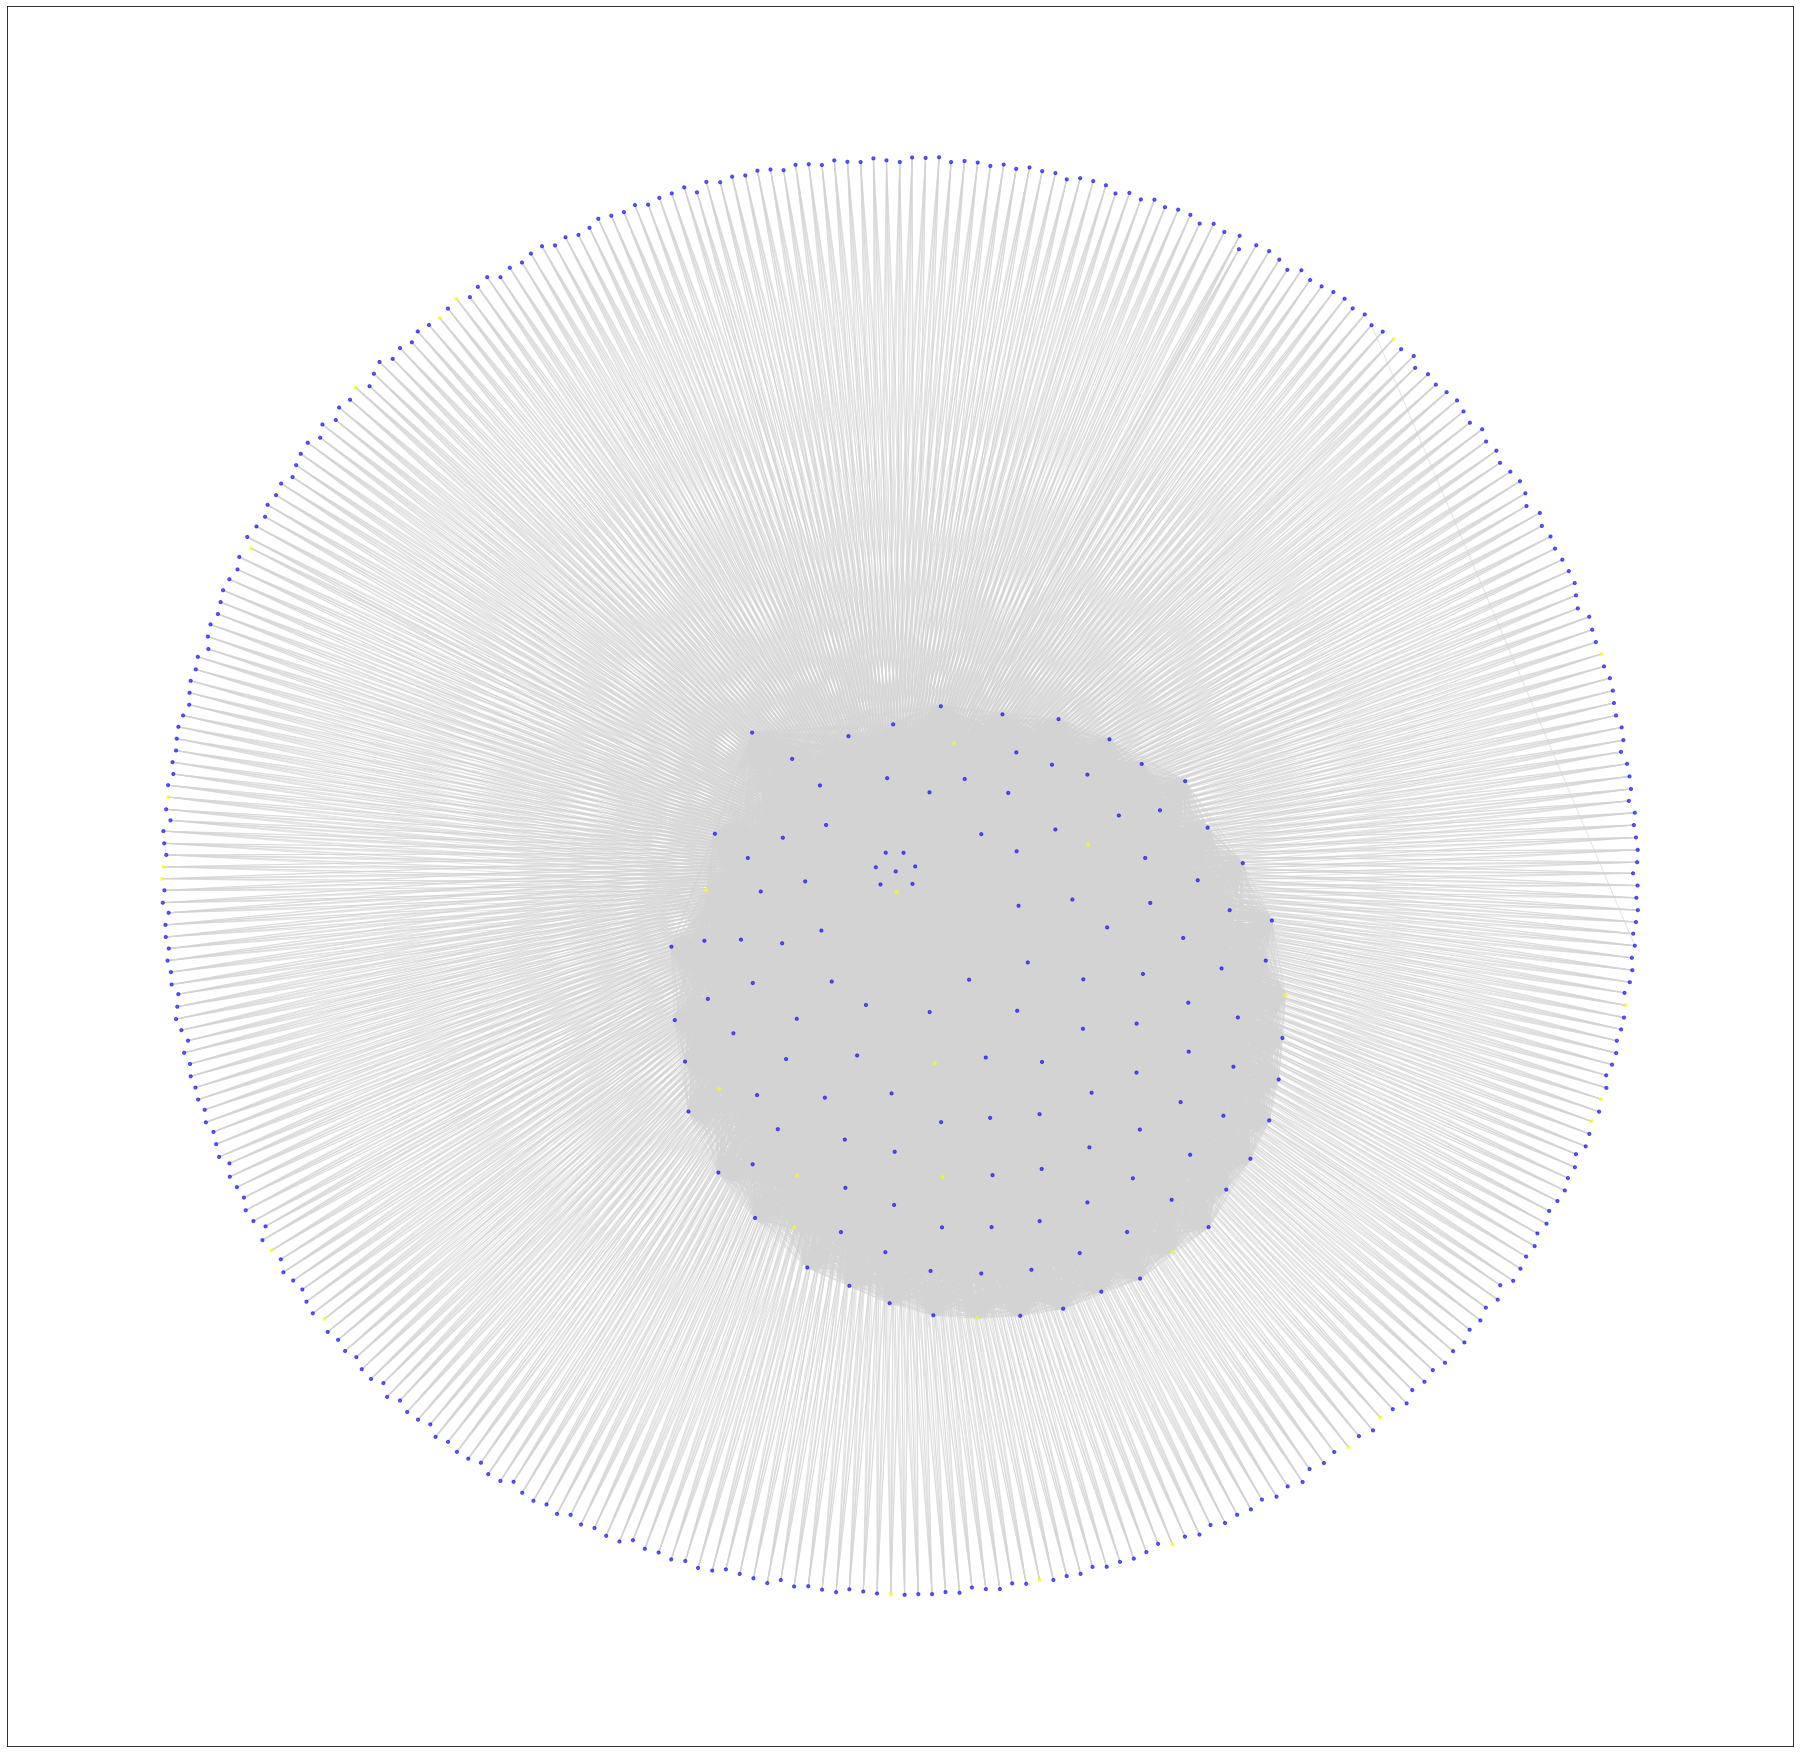

In [73]:
import seaborn as sns
sns.reset_orig()
#create a larger figure
plt.figure(figsize=(32, 32))
# fraud color to node


#place nodes according to the force-directed algorithm
pos = nx.spring_layout(G, k=25, iterations=1000, weight=2, scale=5) # output a dict with the country code as key and pos as value
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=color_map, edge_color="lightgray", alpha=0.6, node_size=10)
plt.show()

In [23]:
# nb_common = nx.get_edge_attributes(G,name="nb_common_attr")
# d=nx.degree(G)

high risk IP (more frauds transactions between IP and email and bank account)

In [97]:
df_sample

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
0,79622457320,Merchant A,Other,2021,13,51,206,True,18.75,GR,GR,MacOS,i1oY1kTOXMlsFfoyhFJxyA,3XBRYto3QgX7g4pX-BvNyA,XldVNN9TQgIA2RE9FTC2TA,Ecommerce,XDED,4236,False,False
1,41293916020,Merchant C,Visa,2021,15,20,345,False,43.65,BR,BR,Android,HZkxQvtpScNLgi0fsoSkjA,klwgzdfrnz_6eGsHSi2prQ,zgRoL8pxX5LJI-SEPUTMvg,Ecommerce,AAD,4802,False,False
2,31382555255,Merchant E,Visa,2021,1,56,293,True,187.72,NL,NL,MacOS,HGW5EwBnHVgOrD5xYplBdw,XkMWeLLmXALPcV3ndwzKJw,T3BF1uOOqgcwaVRb_ujPQg,Ecommerce,1104,4526,False,False
3,13944051314,Merchant D,Visa,2021,12,50,242,False,109.16,NL,NL,iOS,8AuFEjK8m-0lxGAOJzOPmg,26Lw20NQtPKb5cyQZBuh1w,BMf1zFkJ1xvPMlOxC7RWTw,Ecommerce,2039,4571,False,True
4,62343575411,Merchant E,MasterCard,2021,19,26,318,True,46.27,BR,BR,Other,NaN,Y7tv2i85iUadkEIAPIufgg,jfxS2TIe0gR9vpOUdMKrBw,Ecommerce,XOL,4916,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138696,58957356926,Merchant D,Other,2021,10,6,312,True,35.13,BR,BR,Windows,947PJ1zh6yFwZxGOYG8Lnw,ReVzz-e9w8mNO63YA1cjFA,DJHwui3GH60rBpx_tAOZZw,Ecommerce,BZD,4920,True,False
138697,44780141989,Merchant D,MasterCard,2021,10,42,198,False,411.11,NL,NL,MacOS,NaN,Acshv7Bba4JnO0gwpHu5bw,VnFgfzDi69Hsw2mpWvJuIA,POS,2039,4645,False,False
138698,34619316012,Merchant A,MasterCard,2021,23,48,276,True,29.03,BR,BR,Android,-mT_MQEgvNfb5RkbW0oejw,RSYkLbETJb2V9f705zmCkQ,iDlX7WaccSDt1GpQNj5JBQ,Ecommerce,AAD,4571,False,False
138699,68700535373,Merchant A,Other,2021,21,23,307,True,273.14,NL,NL,iOS,13Jg3lRGPEoM3c_vLM-SVQ,Hr4m7amS_osGvEy8O6qVQQ,kFgBFY0u8l72rwwHj7EBtg,Ecommerce,1104,4556,True,False


In [100]:
df_sample

,psp_reference,merchant,card_scheme,year,hour_of_day,minute_of_hour,day_of_year,is_credit,eur_amount,ip_country,issuing_country,device_type,ip_address,email_address,card_number,shopper_interaction,zip_code,card_bin,has_fraudulent_dispute,is_refused_by_adyen
129678,34121155124,Merchant E,MasterCard,2021,14,43,23,True,59.83,ZW,NL,Android,NaN,WxJNVwovAF8sgC_DD2A_oQ,qh2Q1t7H8PhVmsoOuQu5_g,Ecommerce,ZB,4556,False,False
76463,55828004100,Merchant A,Other,2021,18,28,263,True,65.28,NL,NL,Other,bvZV16w1a_56DcQggdaGQA,zORSBa51ZCH_4vI0_e-B0A,Rdbl_Vofst074v0HrU-LSA,Ecommerce,1104,4802,False,False
67548,30999666023,Merchant C,Visa,2021,14,19,3,False,30.94,ZW,ZW,Other,kY9GFpQjfeBqBwPDtG9SQw,NaN,LTZ-Z_hJjKBkX_5AezjedQ,Ecommerce,ZB,4532,False,False
49170,61564520037,Merchant B,Other,2021,22,6,150,True,70.04,BR,BR,iOS,RhINZKnm8bhaFLlVQXCjwQ,UDIDCcjrL2CrmS6j3UspLg,4oTDd7wtL8y3lj1CZ8GxSg,Ecommerce,FFR,4645,False,False
108356,13779104235,Merchant B,Visa,2021,11,39,339,True,40.03,BR,BR,MacOS,cdUVHvI8F5K92LgSAn7RQQ,EzOfW23ZmCmPTBxtONVT0w,qUGtWGYTUZZdIPB2pnKFgg,Ecommerce,FFR,4571,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138677,24400041526,Merchant A,MasterCard,2021,17,49,113,True,475.23,BR,BR,iOS,j2PQ6GVV3ZO-1-dhTjgLZQ,LS4MbXapclJIHPvdiPQ6cA,8pRRhuIhqAhkd79KdVV9tw,Ecommerce,BZD,4571,True,False
138692,58881175828,Merchant A,Other,2021,15,34,220,True,4.23,NL,NL,Other,PrKynTlyny05lum_IwwFLA,qQAyk7PV_wc51vTIxzc8CA,rzVRQc32dLUobW1JAkufeQ,Ecommerce,2039,4571,True,False
138695,17311171741,Merchant B,Visa,2021,6,50,363,True,231.96,ZW,IT,iOS,TxWQp5Ln2d9W28pSM3WFMQ,DyGlPfQWWURqtN3TugAYCA,ib0z1DAwUlKhUsQpvIUP6g,Ecommerce,BB,4622,True,False
138696,58957356926,Merchant D,Other,2021,10,6,312,True,35.13,BR,BR,Windows,947PJ1zh6yFwZxGOYG8Lnw,ReVzz-e9w8mNO63YA1cjFA,DJHwui3GH60rBpx_tAOZZw,Ecommerce,BZD,4920,True,False
